<h1 style='text-align: center;'><u> TASK 01 </u></h1>

# * * * * * * * * * * * * * * * * * * * * *   TASK 1   * * * * * * * * * * * * * * * * * * * * *

## Libraries 

In [1]:
import pandas as pd
import numpy as np

from IPython.display import display # mostrar print() como resultados del jupyter 
import folium # pintar en mapas
import requests # hacer llamadas (GET, POST, ...)
from sklearn.cluster import KMeans # hacer modelo Clustering [k-means]
import matplotlib.pyplot as plt



print('\n\nDONE')



DONE


## Readind the table from wikipedia

In [2]:
url_001='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
list_001 = pd.read_html(url_001)
display(list_001[0])


print('\n\nDONE')

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."




DONE


## Creating dataframe with Toronto`s data

In [3]:
df_001=pd.DataFrame(data=list_001[0])
display(df_001)


print('\n\nDONE')

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."




DONE


## Ignore cells with Borough = ``Not assigned´´

In [4]:
df_002=df_001[df_001.Borough != 'Not assigned'].reset_index(drop=True)
display(df_002)


print('\n\nDONE')

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."




DONE


#### Check duplicates in Postal Code 

In [5]:
df_003=df_002.drop_duplicates('Postal Code')

print('The length of df_002 is ',len(df_002))
print('The length of df_003 is ',len(df_003))

if len(df_002) == len(df_003):
    print('\nThere are not duplicates in Postal Code')
else: 
    print('\nHave to group by Postal Code')


print('\n\nDONE')

The length of df_002 is  103
The length of df_003 is  103

There are not duplicates in Postal Code


DONE


#### Look for ``Not assigned´´ in Neighborhood

In [6]:
df_004=df_002[df_002.Neighborhood == 'Not assigned']
print('The length of df_004 is ',len(df_004))

if len(df_004) == 0:
    print('\nThere are not ``Not assigned´´ values in Neighborhood')
else: 
    print('\nHave to update the values in Neighborhood')
    

print('\n\nDONE')

The length of df_004 is  0

There are not ``Not assigned´´ values in Neighborhood


DONE


## Dimensions about dataframe

In [7]:
print('Dimensions of dataframe\t=',df_002.shape)
print('Rows in dataframe\t=',df_002.shape[0])
print('Columns in dataframe\t=',df_002.shape[1])


print('\n\nDONE')

Dimensions of dataframe	= (103, 3)
Rows in dataframe	= 103
Columns in dataframe	= 3


DONE


<h1 style='text-align: center;'><u> TASK 02 </u></h1>

# * * * * * * * * * * * * * * * * * * * * *   TASK 2   * * * * * * * * * * * * * * * * * * * * *

## Load geospatial file

In [8]:
df_005 = pd.read_csv('Geospatial_Coordinates.csv')
display(df_005)


print('\n\nDONE')

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437




DONE


## Cross data between dataframes

In [9]:
df_006=df_002.join(df_005.set_index('Postal Code'), on='Postal Code')
display(df_006)


print('\n\nDONE')

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509




DONE


#### Check there is not null values 

In [10]:
df_nulos=df_006.isnull()
true_count=df_nulos.sum()
print(true_count)

print('\n\nDONE')

Postal Code     0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64


DONE


<h1 style='text-align: center;'><u> TASK 03 </u></h1>

# * * * * * * * * * * * * * * * * * * * * *   TASK 3   * * * * * * * * * * * * * * * * * * * * *

## Select datas with ``Toronto´´ word in Borough

In [11]:
A='Toronto'
df_007=pd.DataFrame()
for i in range(len(df_006)):
    B=df_006.Borough[i]
    C=A in B
    if C == True:
        df_007=df_007.append(df_006.loc[i])
    
df_007.reset_index(drop=True,inplace=True)
display(df_007)


print('\n\nDONE')

,Borough,Latitude,Longitude,Neighborhood,Postal Code
0,Downtown Toronto,43.654260,-79.360636,"Regent Park, Harbourfront",M5A
1,Downtown Toronto,43.662301,-79.389494,"Queen's Park, Ontario Provincial Government",M7A
2,Downtown Toronto,43.657162,-79.378937,"Garden District, Ryerson",M5B
3,Downtown Toronto,43.651494,-79.375418,St. James Town,M5C
4,East Toronto,43.676357,-79.293031,The Beaches,M4E
5,Downtown Toronto,43.644771,-79.373306,Berczy Park,M5E
6,Downtown Toronto,43.657952,-79.387383,Central Bay Street,M5G
7,Downtown Toronto,43.669542,-79.422564,Christie,M6G
8,Downtown Toronto,43.650571,-79.384568,"Richmond, Adelaide, King",M5H
9,West Toronto,43.669005,-79.442259,"Dufferin, Dovercourt Village",M6H




DONE


#### Get values of Postal Code with ``Toronto´´
Check that is not duplicated values in Postal Code, because the lenght of the list with their unique values is the same that the length of the dataframe

In [12]:
list_toronto_postal=(df_007['Postal Code'].unique())
print(list_toronto_postal)
print(len(list_toronto_postal))

print('\n\nDONE')

['M5A' 'M7A' 'M5B' 'M5C' 'M4E' 'M5E' 'M5G' 'M6G' 'M5H' 'M6H' 'M5J' 'M6J'
 'M4K' 'M5K' 'M6K' 'M4L' 'M5L' 'M4M' 'M4N' 'M5N' 'M4P' 'M5P' 'M6P' 'M4R'
 'M5R' 'M6R' 'M4S' 'M5S' 'M6S' 'M4T' 'M5T' 'M4V' 'M5V' 'M4W' 'M5W' 'M4X'
 'M5X' 'M4Y' 'M7Y']
39


DONE


#### Get values of Boroughs with ``Toronto´´ 

In [13]:
list_toronto_borough=df_007.drop_duplicates('Borough').iloc[:,0].values.tolist()
print(list_toronto_borough)


print('\n\nDONE')

['Downtown Toronto', 'East Toronto', 'West Toronto', 'Central Toronto']


DONE


#### Print a map depending on Borough 

In [14]:
# geolocalizacion 
latitud=43.68
longitud=-79.4

# generar mapa centrado en un punto de inicio
toronto_map = folium.Map(location=[latitud, longitud], zoom_start=12) 

# pintar los barrios
for lat, lng, distrito,barrio,postal in zip(df_007.Latitude, df_007.Longitude, df_007.Borough, df_007.Neighborhood,df_007['Postal Code']):
    if distrito == list_toronto_borough[0]:
        folium.Marker([lat, lng],tooltip=distrito,popup=barrio,icon=(folium.Icon(icon='',color='cadetblue'))).add_to(toronto_map)
    elif distrito == list_toronto_borough[1]:
        folium.Marker([lat, lng],tooltip=distrito,popup=barrio,icon=(folium.Icon(icon='',color='green'))).add_to(toronto_map)
    elif distrito == list_toronto_borough[2]:
        folium.Marker([lat, lng],tooltip=distrito,popup=barrio,icon=(folium.Icon(icon='',color='orange'))).add_to(toronto_map)
    else:
        folium.Marker([lat, lng],tooltip=distrito,popup=barrio,icon=(folium.Icon(icon='',color='red'))).add_to(toronto_map)

# mostrar mapa
display(toronto_map)


print('\n\nDONE')



DONE


## Get datas from Foursquare
First I am going to develop the process with one Neighborhood  
Second I will make a loop for the rest of the Neighborhoods

#### Select an initial point
In my case I look for coordinates from 'Central Toronto', and then I select one, in this case 'The Annex' Neighborhood (index = 24)

In [15]:
display(df_007[df_007.Borough=='Central Toronto'])
initial_point=df_007.iloc[24,:]
display(initial_point)


print('\n\nDONE')

,Borough,Latitude,Longitude,Neighborhood,Postal Code
18,Central Toronto,43.728020,-79.388790,Lawrence Park,M4N
19,Central Toronto,43.711695,-79.416936,Roselawn,M5N
20,Central Toronto,43.712751,-79.390197,Davisville North,M4P
21,Central Toronto,43.696948,-79.411307,"Forest Hill North & West, Forest Hill Road Park",M5P
23,Central Toronto,43.715383,-79.405678,"North Toronto West, Lawrence Park",M4R
24,Central Toronto,43.672710,-79.405678,"The Annex, North Midtown, Yorkville",M5R
26,Central Toronto,43.704324,-79.388790,Davisville,M4S
29,Central Toronto,43.689574,-79.383160,"Moore Park, Summerhill East",M4T
31,Central Toronto,43.686412,-79.400049,"Summerhill West, Rathnelly, South Hill, Forest...",M4V


Borough                             Central Toronto
Latitude                                    43.6727
Longitude                                  -79.4057
Neighborhood    The Annex, North Midtown, Yorkville
Postal Code                                     M5R
Name: 24, dtype: object



DONE


#### Print the initial point 

In [16]:
# geolocalizacion 
latitud=43.68
longitud=-79.4

# generar mapa centrado en un punto de inicio
toronto_map = folium.Map(location=[latitud, longitud], zoom_start=12) 

# pintar barrios (y destacar el seleccionado)
for lat, lng, distrito,barrio,postal in zip(df_007.Latitude, df_007.Longitude, df_007.Borough, df_007.Neighborhood,df_007['Postal Code']):
    if 'The Annex'  in barrio:
        folium.Marker([lat, lng],tooltip=distrito,popup=barrio,icon=(folium.Icon(icon='',color='red'))).add_to(toronto_map)
    else:
        folium.Marker([lat, lng],tooltip=distrito,popup=barrio,icon=(folium.Icon(icon='',color='cadetblue'))).add_to(toronto_map)

# pintar area respecto punto inicial
folium.CircleMarker(
    [initial_point.Latitude, initial_point.Longitude],
    radius=350,
    color='red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.1
    ).add_to(toronto_map)

# mostrar mapa
display(toronto_map)


print('\n\nDONE')



DONE


#### Credentials Foursquare

In [17]:
CLIENT_ID = 'VVJQ2FTM2BLDHPGYLXDYYTYYZ0CGJNLHNMB2MJA1CPE3AHHL' 
CLIENT_SECRET = '242OM3K5XL4VCC2W1TFNYUDLIHWLCGSXEBJKHWYP0A4MVAJY' 
VERSION = '20180604'



print('\n\nDONE')



DONE


#### Create call
I look for information in Foursquare from the initial point

In [18]:
area_busqueda =350
limite=100
latitud=initial_point.Latitude
longitud=initial_point.Longitude

url_01 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitud, longitud, VERSION, area_busqueda, limite)

print(url_01)


print('\n\nDONE')

https://api.foursquare.com/v2/venues/search?client_id=VVJQ2FTM2BLDHPGYLXDYYTYYZ0CGJNLHNMB2MJA1CPE3AHHL&client_secret=242OM3K5XL4VCC2W1TFNYUDLIHWLCGSXEBJKHWYP0A4MVAJY&ll=43.6727097,-79.40567840000001&v=20180604&radius=350&limit=100


DONE


#### Make call

In [19]:
results_01 = requests.get(url_01).json()

#display(results_01)


print('\n\nDONE')



DONE


#### Extract information

In [20]:
# Se saca la info del JSON de la respuesta
info_001 = results_01['response']['venues']

# Se mete la info en un dataframe
df_008 = pd.json_normalize(info_001)
display(df_008.head())
print(df_008.shape)


print('\n\nDONE')

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.crossStreet,location.neighborhood
0,52194f2d11d2e9bb4c782e98,Havinn,"[{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...",v-1594123338,False,118 Spadina,43.672392,-79.406324,"[{'label': 'display', 'lat': 43.67239247970061...",62,CA,Toronto,ON,Canada,"[118 Spadina, Toronto ON, Canada]",NaN,NaN,NaN
1,59f655cca87921744858ec5d,Escape Casa Loma,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",v-1594123338,False,1 Austin Terr,43.678569,-79.409729,"[{'label': 'display', 'lat': 43.678569, 'lng':...",729,CA,Toronto,ON,Canada,"[1 Austin Terr, Toronto ON M5R 1X8, Canada]",M5R 1X8,NaN,NaN
2,4cd7599bdfb4a1cde721645c,100 Spadina Rd,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1594123338,False,NaN,43.671144,-79.405917,"[{'label': 'display', 'lat': 43.67114434821158...",175,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,NaN,NaN
3,4dc89a1dfa761aaccadc64e3,Spadina Rd & Bernard Ave,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1594123338,False,Spadina Rd,43.672018,-79.404950,"[{'label': 'display', 'lat': 43.67201843480384...",96,CA,Toronto,ON,Canada,"[Spadina Rd (Bernard Ave), Toronto ON, Canada]",NaN,Bernard Ave,NaN
4,56cf2c68498e1c64cd91eaba,The Annex,"[{'id': '5032891291d4c4b30a586d68', 'name': 'A...",v-1594123338,False,123 Spadina Rd,43.671731,-79.405486,"[{'label': 'display', 'lat': 43.67173051960982...",110,CA,Toronto,ON,Canada,"[123 Spadina Rd, Toronto ON M5R 2T1, Canada]",M5R 2T1,NaN,NaN


(100, 18)


DONE


#### Clean data

In [21]:
df_009=df_008.iloc[:,[0,1,6,7]]
df_009.columns=['ID','NAME','LAT','LON']
df_009.loc[:,'CATEGO']='NaN' 
df_009.loc[:,'POSTAL']=list_toronto_postal[24]
display(df_009.head())


print('\n\nDONE')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ID,NAME,LAT,LON,CATEGO,POSTAL
0,52194f2d11d2e9bb4c782e98,Havinn,43.672392,-79.406324,NaN,M5R
1,59f655cca87921744858ec5d,Escape Casa Loma,43.678569,-79.409729,NaN,M5R
2,4cd7599bdfb4a1cde721645c,100 Spadina Rd,43.671144,-79.405917,NaN,M5R
3,4dc89a1dfa761aaccadc64e3,Spadina Rd & Bernard Ave,43.672018,-79.404950,NaN,M5R
4,56cf2c68498e1c64cd91eaba,The Annex,43.671731,-79.405486,NaN,M5R




DONE


#### Get category of the venue

In [22]:
list_catego=[]
for i in range(len(df_008)):
    try:
        name_catego=df_008.iloc[i,2][0]['name']
        list_catego.append(name_catego)
    except:
        list_catego.append('NaN')
df_009['CATEGO']=list_catego
display(df_009.head(10))


print('\n\nDONE')

<ipython-input-22-e6a7abc9c65d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_009['CATEGO']=list_catego


,ID,NAME,LAT,LON,CATEGO,POSTAL
0,52194f2d11d2e9bb4c782e98,Havinn,43.672392,-79.406324,Bed & Breakfast,M5R
1,59f655cca87921744858ec5d,Escape Casa Loma,43.678569,-79.409729,General Entertainment,M5R
2,4cd7599bdfb4a1cde721645c,100 Spadina Rd,43.671144,-79.405917,Residential Building (Apartment / Condo),M5R
3,4dc89a1dfa761aaccadc64e3,Spadina Rd & Bernard Ave,43.672018,-79.404950,Building,M5R
4,56cf2c68498e1c64cd91eaba,The Annex,43.671731,-79.405486,Assisted Living,M5R
5,4c41aeefd7fad13afada07da,Student Coop Housing,43.672746,-79.405345,NaN,M5R
6,5c5c9c97061b51002ce22145,Elevate Rooms Spadina Guesthouse,43.671062,-79.405440,Hotel,M5R
7,4bdaf4442a3a0f477ca9acb6,Sweetspot.ca,43.674013,-79.405554,NaN,M5R
8,4af70de9f964a520420522e3,Wise/McDonald Manor,43.673585,-79.405473,NaN,M5R
9,4afdef74f964a520312c22e3,Shoppers Drug Mart,43.674959,-79.407986,Pharmacy,M5R




DONE


### I know that the postal code does not exist in some venues, but I make the guess that all venues obtained from the call have the same postal code as the Neighborhood

## Get the rest of the Neighborhood

In [23]:
CLIENT_ID = 'VVJQ2FTM2BLDHPGYLXDYYTYYZ0CGJNLHNMB2MJA1CPE3AHHL' 
CLIENT_SECRET = '242OM3K5XL4VCC2W1TFNYUDLIHWLCGSXEBJKHWYP0A4MVAJY' 
VERSION = '20180604'
area_busqueda =350
limite=100

list_foursquare=[]
for i in range(len(df_007)):    
    df_name='df_foursquare_'+str(i)
    list_foursquare.append(df_name)    

for i in range(len(df_007)):
        initial_point=df_007.iloc[i,:]
        latitud=initial_point.Latitude
        longitud=initial_point.Longitude
        url_01 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitud, longitud, VERSION, area_busqueda, limite)
        results_01 = requests.get(url_01).json()
        info_001 = results_01['response']['venues']
        list_foursquare[i] = pd.json_normalize(info_001)


print('\n\nDONE')



DONE


#### Save the datas in a dataframe

In [24]:
df_foursquare=pd.DataFrame()
for i in range(len(list_foursquare)):
        df_auxiliar=pd.DataFrame(data=list_foursquare[i])
        df_auxiliar['Postal']=list_toronto_postal[i]
        df_foursquare=df_foursquare.append(df_auxiliar)

display(df_foursquare.shape)
display(df_foursquare.head())


print('\n\nDONE')

(3720, 20)

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.crossStreet,venuePage.id,Postal,location.neighborhood
0,4bc70f5d14d7952126a066e9,Sackville Playground,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1594123339,False,420 king st E,43.654656,-79.359871,"[{'label': 'display', 'lat': 43.65465604258614...",75,CA,Toronto,ON,Canada,"[420 king st E, Toronto ON, Canada]",NaN,NaN,NaN,M5A,NaN
1,5bdc6c2bba57b4002c4c71a8,Oldtown Bodega,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1594123339,False,NaN,43.653966,-79.360752,"[{'label': 'display', 'lat': 43.653966, 'lng':...",34,CA,Toronto,ON,Canada,"[Toronto ON M5A 1L6, Canada]",M5A 1L6,NaN,NaN,M5A,NaN
2,55e8cc7a498e795a53d81d36,TTC Streetcar #503 Kingston Rd,"[{'id': '4f2a23984b9023bd5841ed2c', 'name': 'M...",v-1594123339,False,NaN,43.648099,-79.382932,"[{'label': 'display', 'lat': 43.64809856353395...",1922,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,NaN,NaN,M5A,NaN
3,53b8466a498e83df908c3f21,Tandem Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1594123339,False,368 King St E,43.653559,-79.361809,"[{'label': 'display', 'lat': 43.65355870959944...",122,CA,Toronto,ON,Canada,"[368 King St E (at Trinity St), Toronto ON, Ca...",NaN,at Trinity St,NaN,M5A,NaN
4,4b0d4672f964a520854523e3,TTC Streetcar #504 King St,"[{'id': '4f2a23984b9023bd5841ed2c', 'name': 'M...",v-1594123339,False,King St.,43.646151,-79.396000,"[{'label': 'display', 'lat': 43.64615120880793...",2988,CA,Toronto,ON,Canada,"[King St. (Moving Target!), Toronto ON, Canada]",NaN,Moving Target!,NaN,M5A,NaN




DONE


#### Clean data

In [25]:
df_clean=df_foursquare.loc[:,['id','name','location.lat','location.lng','Postal']]
df_clean.columns=['VENUE ID','VENUE NAME','VENUE LAT','VENUE LON','POSTAL']
df_clean.loc[:,'CATEGO']='NaN' 
display(df_clean.shape)
display(df_clean.head())


print('\n\nDONE')

(3720, 6)

,VENUE ID,VENUE NAME,VENUE LAT,VENUE LON,POSTAL,CATEGO
0,4bc70f5d14d7952126a066e9,Sackville Playground,43.654656,-79.359871,M5A,NaN
1,5bdc6c2bba57b4002c4c71a8,Oldtown Bodega,43.653966,-79.360752,M5A,NaN
2,55e8cc7a498e795a53d81d36,TTC Streetcar #503 Kingston Rd,43.648099,-79.382932,M5A,NaN
3,53b8466a498e83df908c3f21,Tandem Coffee,43.653559,-79.361809,M5A,NaN
4,4b0d4672f964a520854523e3,TTC Streetcar #504 King St,43.646151,-79.396000,M5A,NaN




DONE


#### Get category of the venue

In [26]:
list_catego_01=[]
for i in range(len(df_foursquare)):
    try:
        name_catego=df_foursquare.iloc[i,2][0]['name']
        list_catego_01.append(name_catego)
    except:
        list_catego_01.append('NaN')
        
df_clean['CATEGO']=list_catego_01
display(df_clean.head(20))

print('\n\nDONE')

,VENUE ID,VENUE NAME,VENUE LAT,VENUE LON,POSTAL,CATEGO
0,4bc70f5d14d7952126a066e9,Sackville Playground,43.654656,-79.359871,M5A,Park
1,5bdc6c2bba57b4002c4c71a8,Oldtown Bodega,43.653966,-79.360752,M5A,Café
2,55e8cc7a498e795a53d81d36,TTC Streetcar #503 Kingston Rd,43.648099,-79.382932,M5A,Moving Target
3,53b8466a498e83df908c3f21,Tandem Coffee,43.653559,-79.361809,M5A,Coffee Shop
4,4b0d4672f964a520854523e3,TTC Streetcar #504 King St,43.646151,-79.396000,M5A,Moving Target
5,4dc9d4d9d16495ca5add0803,Cam's Auto Service,43.654195,-79.360545,M5A,Automotive Shop
6,50760559e4b0e8c7babe2497,Body Blitz Spa East,43.654735,-79.359874,M5A,Spa
7,5e5d749285a0610007e60fe8,Terroni Sud Forno Produzione e Spaccio,43.653903,-79.360018,M5A,Gourmet Shop
8,58c8333104f4d7391587afd4,Globe and Mail Centre,43.651520,-79.364804,M5A,Building
9,4dd1ac05e4cd7f7178b89a3f,360 Health Care,43.653361,-79.362061,M5A,Medical Center




DONE


#### Look for the most common categories 

In [27]:
df_conteo=df_clean['CATEGO'].value_counts(dropna=False,ascending=False).reset_index()
df_conteo.columns=['CATEGO','Conteo']
print(df_conteo.head(10))


print('\n\nDONE')

                                     CATEGO  Conteo
0                                       NaN     429
1                                    Office     269
2  Residential Building (Apartment / Condo)     121
3                                  Building     115
4                               Coffee Shop      78
5                                      Café      51
6                                      Park      51
7                            Medical Center      50
8                        Salon / Barbershop      47
9                          Dentist's Office      45


DONE


#### Obtain venues whose categories have a count greater than 50 (and is not 'NaN')

In [28]:
list_catego_02=[]
for i in range(len(df_conteo)):
    if df_conteo.Conteo[i] >= 50 and df_conteo.CATEGO[i] != 'NaN':
        list_catego_02.append(df_conteo.CATEGO[i])
print(list_catego_02)


boolean_CATEGO = df_clean.CATEGO.isin(list_catego_02)
df_top_venues = df_clean[boolean_CATEGO].reset_index(drop=True)
display(df_top_venues)


print('\n\nDONE')

['Office', 'Residential Building (Apartment / Condo)', 'Building', 'Coffee Shop', 'Café', 'Park', 'Medical Center']


,VENUE ID,VENUE NAME,VENUE LAT,VENUE LON,POSTAL,CATEGO
0,4bc70f5d14d7952126a066e9,Sackville Playground,43.654656,-79.359871,M5A,Park
1,5bdc6c2bba57b4002c4c71a8,Oldtown Bodega,43.653966,-79.360752,M5A,Café
2,53b8466a498e83df908c3f21,Tandem Coffee,43.653559,-79.361809,M5A,Coffee Shop
3,58c8333104f4d7391587afd4,Globe and Mail Centre,43.651520,-79.364804,M5A,Building
4,4dd1ac05e4cd7f7178b89a3f,360 Health Care,43.653361,-79.362061,M5A,Medical Center
...,...,...,...,...,...,...
730,4af10c41f964a520a2e021e3,1305 queen street east,43.664096,-79.326545,M7Y,Building
731,4fb1429ae4b091b4639eba21,Spring Realty Inc,43.664733,-79.324213,M7Y,Office
732,521dd87d11d25c45c6ee9ba9,UPS 7 Woodfield,43.664050,-79.320675,M7Y,Office
733,4d02a42c37036dcb2d9504fb,Paincare,43.664676,-79.325693,M7Y,Building




DONE


#### Get list of postal code, to check it and use it to group next

In [29]:
list_postal=(df_top_venues['POSTAL'].unique())
print(list_postal)
print(len(list_postal))

print('\n\nDONE')

['M5A' 'M7A' 'M5B' 'M5C' 'M4E' 'M5E' 'M5G' 'M6G' 'M5H' 'M6H' 'M5J' 'M6J'
 'M4K' 'M5K' 'M6K' 'M4L' 'M5L' 'M4M' 'M4N' 'M5N' 'M4P' 'M5P' 'M6P' 'M4R'
 'M5R' 'M6R' 'M4S' 'M5S' 'M6S' 'M4T' 'M5T' 'M4V' 'M5V' 'M4W' 'M5W' 'M4X'
 'M5X' 'M4Y' 'M7Y']
39


DONE


In [30]:
df_010 = pd.get_dummies(df_top_venues[['CATEGO']])
df_010['PostalCode']=df_top_venues.POSTAL
df_group = df_010.groupby('PostalCode').mean().reset_index()
display(df_group.head(10))


print('\n\nDONE')

,PostalCode,CATEGO_Building,CATEGO_Café,CATEGO_Coffee Shop,CATEGO_Medical Center,CATEGO_Office,CATEGO_Park,CATEGO_Residential Building (Apartment / Condo)
0,M4E,0.300000,0.000000,0.200000,0.000000,0.100000,0.300000,0.100000
1,M4K,0.000000,0.000000,0.100000,0.300000,0.400000,0.200000,0.000000
2,M4L,0.066667,0.066667,0.066667,0.200000,0.200000,0.266667,0.133333
3,M4M,0.375000,0.125000,0.250000,0.000000,0.250000,0.000000,0.000000
4,M4N,0.250000,0.125000,0.125000,0.000000,0.250000,0.250000,0.000000
5,M4P,0.062500,0.000000,0.000000,0.062500,0.125000,0.062500,0.687500
6,M4R,0.000000,0.125000,0.250000,0.125000,0.250000,0.125000,0.125000
7,M4S,0.166667,0.333333,0.416667,0.000000,0.000000,0.000000,0.083333
8,M4T,0.368421,0.000000,0.000000,0.052632,0.315789,0.157895,0.105263
9,M4V,0.135135,0.054054,0.027027,0.108108,0.378378,0.027027,0.270270




DONE


## Apply model K-means to group in cluster (4 clusters)

In [31]:
# Only number values in dataframe
df_011 = df_group.drop('PostalCode', 1)

# Run model
model_001 = KMeans(init="k-means++", n_clusters=4, n_init=12, random_state=0).fit(df_011)

# See clusters
print(model_001.labels_)


print('\n\nDONE')

[2 2 2 0 2 3 0 0 2 3 3 0 3 1 0 1 1 0 1 3 1 1 2 2 3 0 2 0 1 1 1 2 0 1 2 0 2
 2 2]


DONE


#### Include the clusters to each corresponding Postal Code and join with the data of Borough, Neighborhood, Latitude and Longitude

In [32]:
df_group['cluster']=model_001.labels_
df_012 = df_group
df_012 = df_012.join(df_006.set_index('Postal Code'), on='PostalCode')
display(df_012.head())



print('\n\nDONE')

,PostalCode,CATEGO_Building,CATEGO_Café,CATEGO_Coffee Shop,CATEGO_Medical Center,CATEGO_Office,CATEGO_Park,CATEGO_Residential Building (Apartment / Condo),cluster,Borough,Neighborhood,Latitude,Longitude
0,M4E,0.300000,0.000000,0.200000,0.0,0.10,0.300000,0.100000,2,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,0.000000,0.000000,0.100000,0.3,0.40,0.200000,0.000000,2,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,0.066667,0.066667,0.066667,0.2,0.20,0.266667,0.133333,2,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,0.375000,0.125000,0.250000,0.0,0.25,0.000000,0.000000,0,East Toronto,Studio District,43.659526,-79.340923
4,M4N,0.250000,0.125000,0.125000,0.0,0.25,0.250000,0.000000,2,Central Toronto,Lawrence Park,43.728020,-79.388790




DONE


#### Print clusters

In [33]:
# geolocalizacion 
latitud=43.68
longitud=-79.4

# generar mapa centrado en un punto de inicio
toronto_map = folium.Map(location=[latitud, longitud], zoom_start=12) 

# pintar barrios (y destacar el seleccionado)
for lat, lng, distrito,barrio,cluster in zip(df_012.Latitude, df_012.Longitude, df_012.Borough, df_012.Neighborhood,df_012.cluster):
    folium.Marker([lat, lng],tooltip=distrito,popup=barrio,icon=(folium.Icon(icon='',color='cadetblue'))).add_to(toronto_map)
    if cluster == 0:
        folium.Marker([lat, lng],tooltip=cluster,icon=(folium.Icon(icon='',color='cadetblue'))).add_to(toronto_map)
    elif cluster == 1:
        folium.Marker([lat, lng],tooltip=cluster,icon=(folium.Icon(icon='',color='orange'))).add_to(toronto_map)
    elif cluster == 2:
        folium.Marker([lat, lng],tooltip=cluster,icon=(folium.Icon(icon='',color='green'))).add_to(toronto_map)
    else:
        folium.Marker([lat, lng],tooltip=cluster,icon=(folium.Icon(icon='',color='red'))).add_to(toronto_map)

# mostrar mapa
display(toronto_map)


print('\n\nDONE')



DONE


#### Result clusters

In [34]:
df_result_01 = df_012.groupby('cluster').mean().reset_index()
display(df_result_01)


print('\n\nDONE')

,cluster,CATEGO_Building,CATEGO_Café,CATEGO_Coffee Shop,CATEGO_Medical Center,CATEGO_Office,CATEGO_Park,CATEGO_Residential Building (Apartment / Condo),Latitude,Longitude
0,0,0.166257,0.131556,0.324515,0.054573,0.200237,0.078333,0.044528,43.665084,-79.393993
1,1,0.144730,0.081698,0.094148,0.012084,0.564015,0.026989,0.076336,43.649772,-79.386320
2,2,0.219244,0.060480,0.064326,0.160969,0.243685,0.174955,0.076342,43.677814,-79.389504
3,3,0.132631,0.029766,0.045848,0.054939,0.239163,0.053960,0.443693,43.676352,-79.389728




DONE




DONE


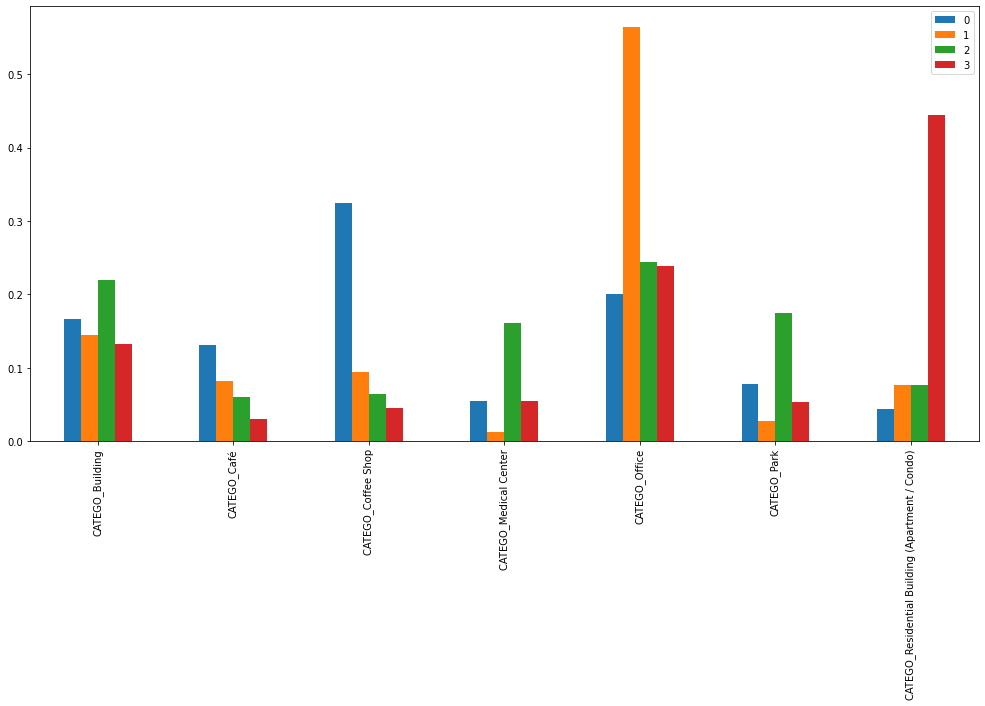

In [35]:
df_graph_01=df_result_01.transpose()
df_graph_01=df_graph_01.drop(['cluster','Latitude','Longitude'])
df_graph_01.plot(kind='bar', figsize=(17, 8))


print('\n\nDONE')

## Apply model K-means to group in cluster (5 clusters)

In [36]:
# Only number values in dataframe
df_013 = df_group.drop('PostalCode', 1)

# Run model
model_002 = KMeans(init="k-means++", n_clusters=5, n_init=12, random_state=0).fit(df_013)

# See clusters
print(model_002.labels_)


print('\n\nDONE')

[4 1 1 2 4 3 2 2 4 3 3 2 3 0 2 0 0 2 0 3 0 0 1 1 3 2 4 2 0 0 0 4 2 0 4 2 1
 1 4]


DONE


#### Include the clusters to each corresponding Postal Code and join with the data of Borough, Neighborhood, Latitude and Longitude

In [37]:
df_group['cluster']=model_002.labels_
df_014 = df_group
df_014 = df_014.join(df_006.set_index('Postal Code'), on='PostalCode')
display(df_014.head())



print('\n\nDONE')

,PostalCode,CATEGO_Building,CATEGO_Café,CATEGO_Coffee Shop,CATEGO_Medical Center,CATEGO_Office,CATEGO_Park,CATEGO_Residential Building (Apartment / Condo),cluster,Borough,Neighborhood,Latitude,Longitude
0,M4E,0.300000,0.000000,0.200000,0.0,0.10,0.300000,0.100000,4,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,0.000000,0.000000,0.100000,0.3,0.40,0.200000,0.000000,1,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,0.066667,0.066667,0.066667,0.2,0.20,0.266667,0.133333,1,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,0.375000,0.125000,0.250000,0.0,0.25,0.000000,0.000000,2,East Toronto,Studio District,43.659526,-79.340923
4,M4N,0.250000,0.125000,0.125000,0.0,0.25,0.250000,0.000000,4,Central Toronto,Lawrence Park,43.728020,-79.388790




DONE


#### Print cluster

In [38]:
# geolocalizacion 
latitud=43.68
longitud=-79.4

# generar mapa centrado en un punto de inicio
toronto_map = folium.Map(location=[latitud, longitud], zoom_start=12) 

# pintar barrios (y destacar el seleccionado)
for lat, lng, distrito,barrio,cluster in zip(df_014.Latitude, df_014.Longitude, df_014.Borough, df_014.Neighborhood,df_014.cluster):
    folium.Marker([lat, lng],tooltip=distrito,popup=barrio,icon=(folium.Icon(icon='',color='cadetblue'))).add_to(toronto_map)
    if cluster == 0:
        folium.Marker([lat, lng],tooltip=cluster,icon=(folium.Icon(icon='',color='cadetblue'))).add_to(toronto_map)
    elif cluster == 1:
        folium.Marker([lat, lng],tooltip=cluster,icon=(folium.Icon(icon='',color='orange'))).add_to(toronto_map)
    elif cluster == 2:
        folium.Marker([lat, lng],tooltip=cluster,icon=(folium.Icon(icon='',color='green'))).add_to(toronto_map)
    elif cluster == 3:
        folium.Marker([lat, lng],tooltip=cluster,icon=(folium.Icon(icon='',color='red'))).add_to(toronto_map)
    else:
        folium.Marker([lat, lng],tooltip=cluster,icon=(folium.Icon(icon='',color='purple'))).add_to(toronto_map)

# mostrar mapa
display(toronto_map)


print('\n\nDONE')



DONE


#### Result cluster

In [39]:
df_result_02 = df_014.groupby('cluster').mean().reset_index()
display(df_result_02)


print('\n\nDONE')

,cluster,CATEGO_Building,CATEGO_Café,CATEGO_Coffee Shop,CATEGO_Medical Center,CATEGO_Office,CATEGO_Park,CATEGO_Residential Building (Apartment / Condo),Latitude,Longitude
0,0,0.144730,0.081698,0.094148,0.012084,0.564015,0.026989,0.076336,43.649772,-79.386320
1,1,0.113625,0.054651,0.071317,0.284439,0.278130,0.149975,0.047863,43.678512,-79.394991
2,2,0.166257,0.131556,0.324515,0.054573,0.200237,0.078333,0.044528,43.665084,-79.393993
3,3,0.132631,0.029766,0.045848,0.054939,0.239163,0.053960,0.443693,43.676352,-79.389728
4,4,0.309774,0.065476,0.058333,0.055138,0.214160,0.196366,0.100752,43.677216,-79.384802




DONE




DONE


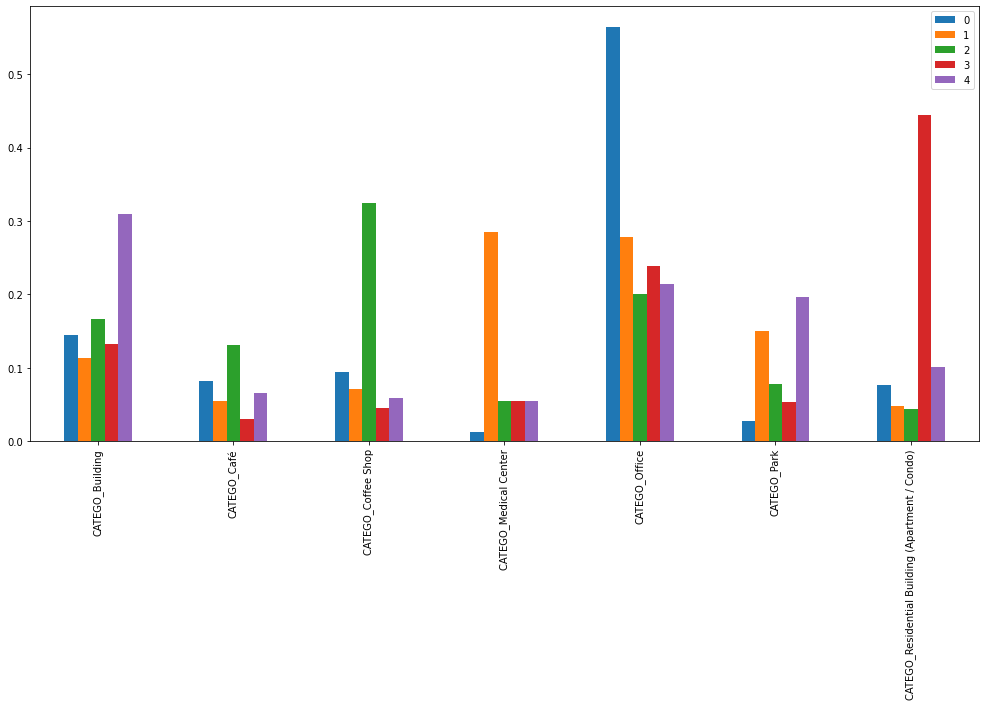

In [40]:
df_graph_02=df_result_02.transpose()
df_graph_02=df_graph_02.drop(['cluster','Latitude','Longitude'])
df_graph_02.plot(kind='bar', figsize=(17, 8))


print('\n\nDONE')

# CONCLUSION

Considering the K-means model of 4 cluster as Model A, and that of 5 clusters as Model B:  
There is some correspondence between cluster 0 of Model A and cluster 1 of Model B, since in both there is a strong presence of Offices.  
There is also correspondence between cluster 1 of Model A and cluster 3 of Model B, in which there is a high frequency of Residential Buildings.  
The last clear map is between cluster 2 of Model A and cluster 0 of Model B, where both have a high presence of Coffee Shop.  
In these 3 cases above the location of the cluster points on the map is the same for both models.  
The points in cluster 3 of Model A are divided between clusters 2 and 4 of Model B, so the relationship between the points in this cluster is less than in the other clusters.